In [91]:
import numpy as np
import pandas as pd
import glob
from sklearn.preprocessing import minmax_scale

labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
candidates = []
fileList = glob.glob('bagging\*')
modelList = []
for file in fileList:
    modelList.append(file.split('\\')[1])    
    candidates.append(pd.read_csv(file, index_col = 0))
for candidate in candidates:
    for label in labels:
        candidate[label] = minmax_scale(candidate[label])

In [92]:
detailed_results = dict()
for label in labels:
    corr_results = pd.DataFrame(np.identity(len(candidates)), index = modelList, columns = modelList)
    for i in range(len(corr_results)):
        for j in range(i):
            model1 = candidates[i]
            model2 = candidates[j]
            cor = []
            cor.append(np.corrcoef(candidates[i][label],candidates[j][label])[0,1])
            corr_results.iloc[i,j] = np.mean(cor)
    detailed_results.update({label: corr_results})

In [90]:
for key in detailed_results.keys():
    print(key)
    print(detailed_results[key])
    #sns.heatmap(detailed_results[key], cmap="YlGnBu")
    #plt.show()

identity_hate
                        blend_it_all.csv  preprocessed_blend.csv  \
blend_it_all.csv                1.000000                0.000000   
preprocessed_blend.csv          0.957352                1.000000   
submission_stack.csv            0.956721                0.930492   
super_blend.csv                 0.411421                0.419855   

                        submission_stack.csv  super_blend.csv  
blend_it_all.csv                     0.00000              0.0  
preprocessed_blend.csv               0.00000              0.0  
submission_stack.csv                 1.00000              0.0  
super_blend.csv                      0.35668              1.0  
insult
                        blend_it_all.csv  preprocessed_blend.csv  \
blend_it_all.csv                1.000000                0.000000   
preprocessed_blend.csv          0.979652                1.000000   
submission_stack.csv            0.987874                0.974395   
super_blend.csv                 0.710466      

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

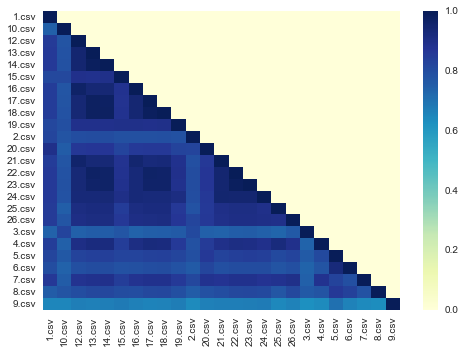

In [77]:
sns.heatmap(corr_results.drop('11.csv').drop('11.csv',axis=1), cmap="YlGnBu")
plt.show()

In [101]:
submission = pd.DataFrame(0, index = candidates[0].index, columns = labels)
weights = [1,1,1,0.5]

for i in range(len(candidates)):
    submission = submission + candidates[i]*weights[i]
submission = submission/np.sum(weights)

submission.to_csv('submission_bagging.csv')

In [103]:
submission

,toxic,severe_toxic,obscene,threat,insult,identity_hate
id,,,,,,
00001cee341fdb12,0.963710,0.491874,0.949810,0.252661,0.909318,0.520078
0000247867823ef7,0.028750,0.067956,0.028074,0.028128,0.040280,0.058464
00013b17ad220c46,0.065294,0.082519,0.071339,0.068084,0.062440,0.072635
00017563c3f7919a,0.015729,0.046725,0.014119,0.060629,0.027746,0.017396
00017695ad8997eb,0.074771,0.064235,0.063681,0.061169,0.063574,0.051723
0001ea8717f6de06,0.031101,0.053964,0.023416,0.083392,0.052897,0.043452
00024115d4cbde0f,0.054756,0.025727,0.045463,0.031115,0.057058,0.042788
000247e83dcc1211,0.488945,0.104694,0.127700,0.120545,0.172143,0.101898
00025358d4737918,0.141342,0.061614,0.103149,0.064239,0.118841,0.085477
